# Import Required Libraries
Import needed libraries to manipulate data and check if we're using the GPU instead of the CPU.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Check TensorFlow version for compatibility
print("TensorFlow version:", tf.__version__)

# List available GPUs for GPU acceleration
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("GPUs:", physical_devices)
    try:
        # Enable dynamic memory growth (best practice to avoid GPU memory errors)
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    except Exception as e:
        pass
else:
    print("No GPU found, using CPU.")

TensorFlow version: 2.10.0
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Check the directory to avoid terminal problems
Print the directory to assure we are in the correct directory

In [2]:
import os
print(os.getcwd())

c:\Users\AlejandroN01\Desktop\Grado_Ale\Física\FÍSICA_UCO\4ºCARRERA\2ºCUATRI\TFG\MLW\R\Rmin


# Load Dataset
Load the dataset into a pandas DataFrame from a CSV or other file format and check the format

In [3]:
# Load dataset as well as checking values and data type
csv_file = 'dataset_Halogenos_Rmin.csv'
dataframe_raw = pd.read_csv(csv_file, sep=",")
dataframe_raw.info()
dataframe_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1183 non-null   int64  
 1   Pos1        1183 non-null   int64  
 2   Pos2        1183 non-null   int64  
 3   Pos3        1183 non-null   int64  
 4   Pos4        1183 non-null   int64  
 5   Pos5        1183 non-null   int64  
 6   Pos6        1183 non-null   int64  
 7   Pos7        1183 non-null   int64  
 8   Pos8        1183 non-null   int64  
 9   Pos9        1183 non-null   int64  
 10  Pos10       1183 non-null   int64  
 11  Pos11       1183 non-null   int64  
 12  Pos12       1183 non-null   int64  
 13  Pos13       1183 non-null   int64  
 14  Pos14       1183 non-null   int64  
 15  Pos15       1183 non-null   int64  
 16  Pos16       1183 non-null   int64  
 17  Nsubs       1183 non-null   int64  
 18  R           1183 non-null   float64
 19  lambd       1183 non-null  

,Unnamed: 0,Pos1,Pos2,Pos3,Pos4,Pos5,Pos6,Pos7,Pos8,Pos9,Pos10,Pos11,Pos12,Pos13,Pos14,Pos15,Pos16,Nsubs,R,lambd
0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,2,-273.2294,350.23
1,1,0,2,0,0,0,4,0,0,0,0,0,3,0,0,0,0,3,-244.0982,353.40
2,2,0,0,0,0,0,0,0,3,0,0,3,3,4,2,0,0,5,-194.6106,359.97
3,3,0,4,0,4,0,0,0,0,0,0,0,2,0,0,3,3,5,-237.2939,369.31
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,2,-309.5538,347.50


# Columns manipulation
Drop Nsubs, R, lambd, so we'll leave with the positions and the target value, but we've saved it R as target before and Nsubs as an array for previous usage for data analysis.

In [4]:
dataframe = dataframe_raw.copy()

# Create a target variable "target" from column "R"
dataframe['target'] = dataframe['R']

# Create array with number of subtitutes
nsubs = dataframe['Nsubs'].values

#Drop unused columns
dataframe = dataframe.drop(columns=['Unnamed: 0', 'Nsubs', 'R', 'lambd'])
dataframe.head()

,Pos1,Pos2,Pos3,Pos4,Pos5,Pos6,Pos7,Pos8,Pos9,Pos10,Pos11,Pos12,Pos13,Pos14,Pos15,Pos16,target
0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,-273.2294
1,0,2,0,0,0,4,0,0,0,0,0,3,0,0,0,0,-244.0982
2,0,0,0,0,0,0,0,3,0,0,3,3,4,2,0,0,-194.6106
3,0,4,0,4,0,0,0,0,0,0,0,2,0,0,3,3,-237.2939
4,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,-309.5538


# Perform Manual Conversion
Demonstrate how to manually convert data types, handle missing values, or transform columns using pandas.

# Number of molecules with n-substitutes graph
 Plot bar of the count for each n-subsitutions from 1 to 6.

Substitute 1: 32
Substitute 2: 151
Substitute 3: 202
Substitute 4: 209
Substitute 5: 210
Substitute 6: 378


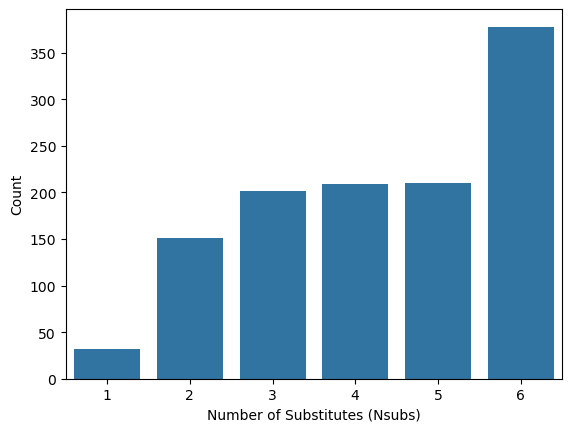

In [5]:
# Count occurrences of each substitute (excluding 0)
unique_subs = np.unique(nsubs[nsubs != 0])  # Exclude 0
counts = {sub: np.count_nonzero(nsubs == sub) for sub in unique_subs}

# Convert counts to a DataFrame for easier plotting with seaborn
counts_df = pd.DataFrame(list(counts.items()), columns=['Nsubs', 'Count'])

# Print counts
for sub, count in counts.items():
    print(f"Substitute {sub}: {count}")

# Plot bar plot using seaborn
sns.barplot(x='Nsubs', y='Count', data=counts_df)
plt.xlabel('Number of Substitutes (Nsubs)')
plt.ylabel('Count')
plt.grid(False)
plt.show()

# Statistics of the data
Means, standar deviations, percentils as well as min an max values

In [6]:
# Check overal statistis of each input feature 
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pos1,1183.0,0.615385,1.202789,0.0000,0.00000,0.0000,1.00000,4.0000
Pos2,1183.0,0.701606,1.251621,0.0000,0.00000,0.0000,1.00000,4.0000
Pos3,1183.0,0.606086,1.205752,0.0000,0.00000,0.0000,0.00000,4.0000
Pos4,1183.0,0.655114,1.214439,0.0000,0.00000,0.0000,1.00000,4.0000
Pos5,1183.0,0.726120,1.301198,0.0000,0.00000,0.0000,1.00000,4.0000
Pos6,1183.0,0.639053,1.232964,0.0000,0.00000,0.0000,1.00000,4.0000
Pos7,1183.0,0.631445,1.207461,0.0000,0.00000,0.0000,1.00000,4.0000
Pos8,1183.0,0.689772,1.241263,0.0000,0.00000,0.0000,1.00000,4.0000
Pos9,1183.0,0.674556,1.233248,0.0000,0.00000,0.0000,1.00000,4.0000
Pos10,1183.0,0.716822,1.290383,0.0000,0.00000,0.0000,1.00000,4.0000


# Mean target value plot
Plot bar representing the Rmax mean absolute value of each of the substitutes


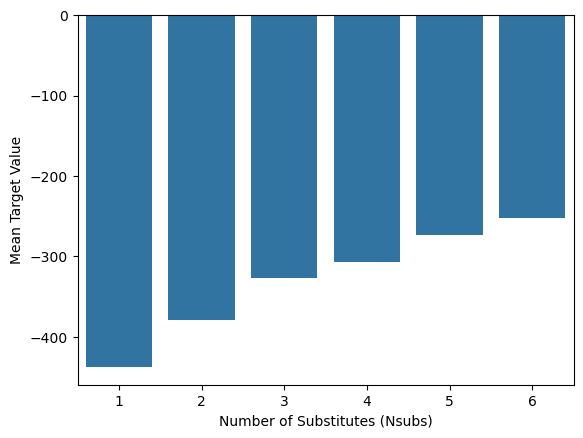

In [7]:
# Mean target value for each number of substitutes (excluding 0)
mask = nsubs != 0
Rmin_abs_mean = dataframe[mask].groupby(nsubs[mask])['target'].mean() # Calculate mean target value without 0

# Create bar plot
sns.barplot(x=Rmin_abs_mean.index, y=Rmin_abs_mean.values)
plt.xlabel('Number of Substitutes (Nsubs)')
plt.ylabel('Mean Target Value')
plt.grid(False)
plt.show()

# Normalization
Normalization of data to reach more stability in the prediction process of the data.

In [8]:
# Normalize the target variable for stability
Rmin_abs_mean = dataframe['target'].mean()
Rmin_abs_std = dataframe['target'].std()
dataframe['target'] = (dataframe['target'] - Rmin_abs_mean) / Rmin_abs_std

print("Mean of target variable:", Rmin_abs_mean)
print("Standard deviation of target variable:", Rmin_abs_std)
# Save Rmin_abs_mean and Rmin_abs_std to a CSV file
stats = pd.DataFrame({'Rmin_abs_mean': [Rmin_abs_mean], 'Rmin_abs_std': [Rmin_abs_std]})
stats.to_csv('Rmin_stats.csv', index=False)

# Check overal statistis of each input feature 
dataframe.describe().transpose()

Mean of target variable: -299.8190789518174
Standard deviation of target variable: 122.41009196664501


,count,mean,std,min,25%,50%,75%,max
Pos1,1183.0,6.153846e-01,1.202789,0.000000,0.000000,0.000000,1.00000,4.000000
Pos2,1183.0,7.016061e-01,1.251621,0.000000,0.000000,0.000000,1.00000,4.000000
Pos3,1183.0,6.060862e-01,1.205752,0.000000,0.000000,0.000000,0.00000,4.000000
Pos4,1183.0,6.551141e-01,1.214439,0.000000,0.000000,0.000000,1.00000,4.000000
Pos5,1183.0,7.261200e-01,1.301198,0.000000,0.000000,0.000000,1.00000,4.000000
Pos6,1183.0,6.390533e-01,1.232964,0.000000,0.000000,0.000000,1.00000,4.000000
Pos7,1183.0,6.314455e-01,1.207461,0.000000,0.000000,0.000000,1.00000,4.000000
Pos8,1183.0,6.897718e-01,1.241263,0.000000,0.000000,0.000000,1.00000,4.000000
Pos9,1183.0,6.745562e-01,1.233248,0.000000,0.000000,0.000000,1.00000,4.000000
Pos10,1183.0,7.168216e-01,1.290383,0.000000,0.000000,0.000000,1.00000,4.000000


# Save Manipulated Dataframe
Saving Dataframe for future use in other notebooks

In [9]:
# Save the dataframe to a CSV file
dataframe.to_csv('processed_data.csv', index=False)
print("Dataframe saved to processed_data.csv")

Dataframe saved to processed_data.csv


# One hot encode molecule
This cell is preparing the data for machine learning by encoding categorical features [H=0, F=1, Cl=2, Br=3, I=4] into a numerical format [H=(1,0,0,0,0), F=(0,1,0,0,0), Cl=(0,0,1,0,0), Br=(0,0,0,1,0), I=(0,0,0,0,1) ] and separating the features (x_data) from the target variable (y_data). By

In [10]:
# One-hot encode the positional features
n_atom_types = 5          # e.g., 5 atom types (H, F, Cl, Br, I)
n_pos = 16                # number of possible positions (16)
n_features = n_atom_types * n_pos  # total one-hot features

# Convert dataframe to NumPy array efficiently
dataset_np = dataframe.values  # Using .values instead of .to_numpy()

# Extract target variable
y_data = dataset_np[:, dataframe.columns.get_loc("target")]

# Apply One-Hot Encoding using get_dummies()
x_data = pd.get_dummies(dataframe.iloc[:, :n_pos].astype(str), dtype=float).values # Ensure the first n_pos columns contain categorical atom types

# Print shape to confirm transformation
print("Shape of encoded features (x_data):", x_data.shape)
print("Shape of target variable (y_data):", y_data.shape)
print("first values of y_data:", y_data[:10])
print("first values of x_data:", x_data[:10])  

Shape of encoded features (x_data): (1183, 80)
Shape of target variable (y_data): (1183,)
first values of y_data: [ 0.21721803  0.45519841  0.85947553  0.51078451 -0.07952548  1.46147328
 -1.3857119   0.16710942  0.45550966 -2.67791745]
first values of x_data: [[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
  0. 0. 0. 1. 0. 0.

# Save data to use it in other the others notebooks
Training and test will need the one-hot encoded data to continue the workflow

In [11]:
# Combine x_data and y_data into a single DataFrame
data_combined = pd.DataFrame(x_data)
data_combined['target'] = y_data  # Add y_data as the target column

# Save the DataFrame to a CSV file
data_combined.to_csv('OHE_data.csv', index=False)